# Predcting Customer Churn
---

[Inspired by the post of Moez Ali](https://towardsdatascience.com/predict-customer-churn-the-right-way-using-pycaret-8ba6541608ac)

<!-- - Descrever dataset
- Realizar análise exploratória de dados um pouco mais completa que a do blog
- Explicar baseline que o modelo precisa bater
- Explicar a verdadeira métrica de negócio relevante para o problema (é a explicação que utiliza a matriz de confusão)
- Explicar a ideia por trás do modelo escolhido e a função de cada hiperparametro -->

In [3]:
import pycaret
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("input/input.csv")

## Exploratory Data Analysis
---

- Análise mais completa que a do Moez
- Incluir _common sense baseline_

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# replace blanks with np.nan
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# convert to float64
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Prediction Model
---
- Explicar o que é "AUC"
- Explicar a métrica de negócio relevantes
- Explicar a ideia por trás do modelo escolhido e a função de cada hiperparametro

In [10]:
from pycaret.classification import setup, compare_models, tune_model, plot_model, add_metric

In [9]:
s = setup(df, target = 'Churn', ignore_features = ['customerID'])

,Description,Value
0,Session id,2296
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Ordinal features,5


In [11]:
best_model = compare_models(sort="AUC", fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8055,0.8454,0.5321,0.6686,0.5909,0.4659,0.4721,0.3770
gbc,Gradient Boosting Classifier,0.8014,0.8453,0.5077,0.6651,0.5744,0.4483,0.4560,0.5740
lr,Logistic Regression,0.8043,0.8413,0.5367,0.6632,0.5916,0.4651,0.4706,1.0300
lda,Linear Discriminant Analysis,0.7978,0.8338,0.5474,0.6404,0.5891,0.4563,0.4595,0.2230
lightgbm,Light Gradient Boosting Machine,0.7949,0.8331,0.5192,0.6417,0.5728,0.4401,0.4450,0.6430
rf,Random Forest Classifier,0.7966,0.8256,0.5054,0.6512,0.5679,0.4379,0.4446,0.4910
qda,Quadratic Discriminant Analysis,0.6694,0.8198,0.8341,0.4402,0.5741,0.3464,0.3957,0.2150
nb,Naive Bayes,0.6921,0.8164,0.8387,0.4566,0.5912,0.3771,0.4223,0.2020
et,Extra Trees Classifier,0.7801,0.7976,0.4794,0.6099,0.5359,0.3948,0.4002,0.5370
knn,K Neighbors Classifier,0.7724,0.7547,0.4556,0.5916,0.5141,0.3691,0.3747,0.3070


In [12]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=2296)


In [13]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7911,0.8294,0.5308,0.6216,0.5726,0.4355,0.4379
1,0.8195,0.8725,0.5769,0.6881,0.6276,0.5097,0.5131
2,0.7972,0.8225,0.5344,0.6422,0.5833,0.4508,0.4541
3,0.8195,0.8669,0.6107,0.6780,0.6426,0.5223,0.5235
4,0.8398,0.8846,0.5725,0.7653,0.6550,0.5535,0.5634
5,0.8154,0.8754,0.4962,0.7222,0.5882,0.4745,0.4884
6,0.7870,0.8060,0.4351,0.6477,0.5205,0.3904,0.4031
7,0.8114,0.8462,0.4809,0.7159,0.5753,0.4600,0.4751
8,0.8012,0.8323,0.5115,0.6634,0.5776,0.4504,0.4570


Fitting 10 folds for each of 10 candidates, totalling 100 fits


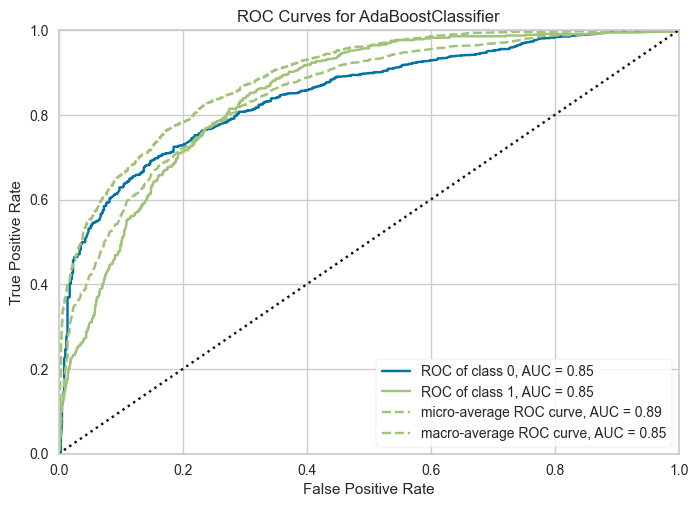

In [14]:
plot_model(tuned_best_model, plot = 'auc')

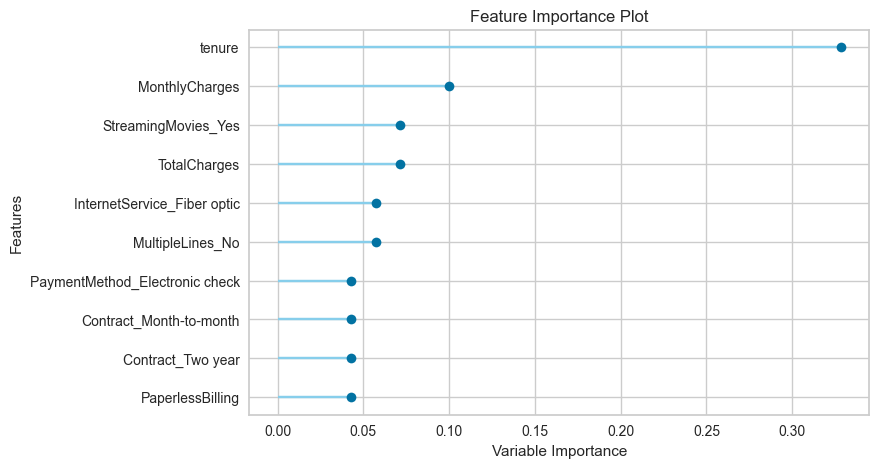

In [17]:
plot_model(tuned_best_model, plot = 'feature')

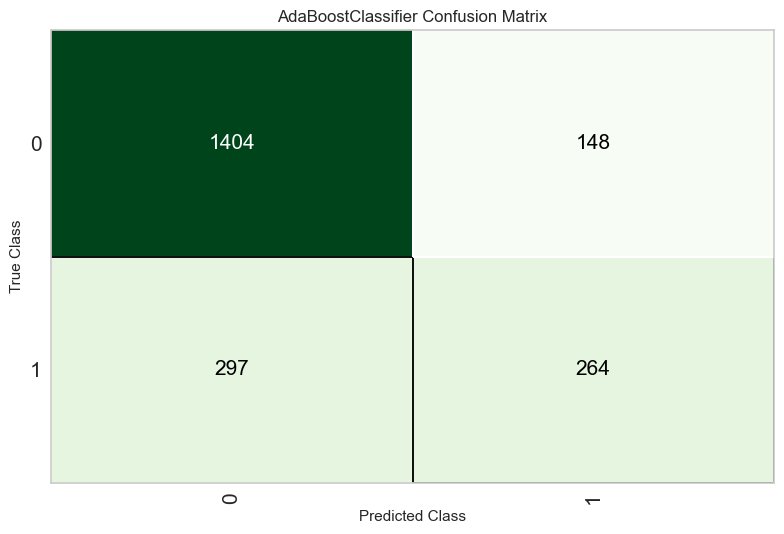

In [18]:
plot_model(tuned_best_model, plot = 'confusion_matrix')

In [19]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp, fp])

# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <function calculate_profit at 0x000001ACD9E655E0>
Scorer                                   make_scorer(calculate_profit)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit, dtype: object

In [20]:
# compare all models
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
lr,Logistic Regression,0.8043,0.8413,0.5367,0.6632,0.5916,0.4651,0.4706,0.0000,0.2830
knn,K Neighbors Classifier,0.7720,0.7546,0.4556,0.5905,0.5136,0.3683,0.3739,0.0000,0.2780
nb,Naive Bayes,0.6921,0.8164,0.8387,0.4566,0.5912,0.3771,0.4223,0.0000,0.2250
dt,Decision Tree Classifier,0.7408,0.6724,0.5230,0.5112,0.5166,0.3397,0.3399,0.0000,0.2620
svm,SVM - Linear Kernel,0.7477,0.0000,0.4618,0.5947,0.4694,0.3206,0.3547,0.0000,0.2310
ridge,Ridge Classifier,0.8014,0.0000,0.5115,0.6659,0.5771,0.4505,0.4580,0.0000,0.2320
rf,Random Forest Classifier,0.7966,0.8256,0.5054,0.6512,0.5679,0.4379,0.4446,0.0000,0.2800
qda,Quadratic Discriminant Analysis,0.6694,0.8198,0.8341,0.4402,0.5741,0.3464,0.3957,0.0000,0.2140
ada,Ada Boost Classifier,0.8055,0.8454,0.5321,0.6686,0.5909,0.4659,0.4721,0.0000,0.2490
gbc,Gradient Boosting Classifier,0.8014,0.8453,0.5077,0.6651,0.5744,0.4483,0.4560,0.0000,0.3250


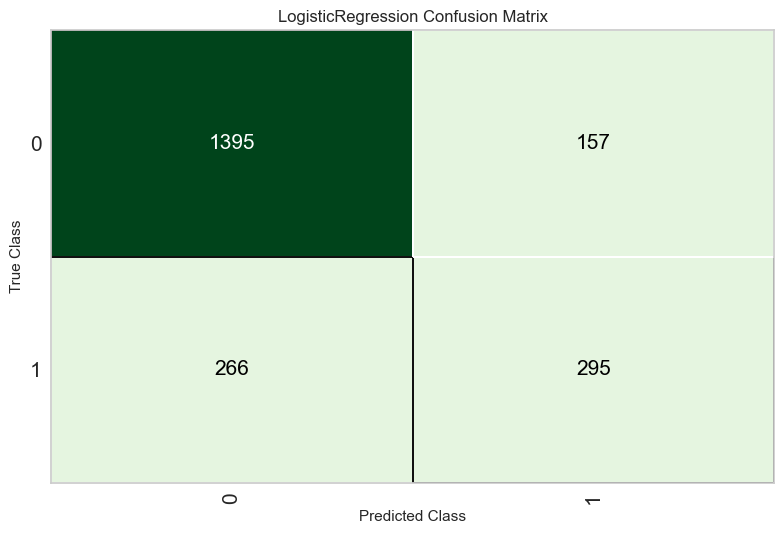

In [21]:
# confusion matrix
plot_model(best_model, plot="confusion_matrix")